In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# helpful character encoding module
import chardet

In [3]:
df = pd.read_csv('./Cartera29122022.csv', encoding='utf-8')
df

,SUC,SOCIO,NOMBRE_DEL_SOCIO,F. NACIMIENTO,SEXO,NOMBRE_ESTADO,NOMBRE_MUNICIPIO,NOMBRE_COLONIA,NOMBRE_LOCALIDAD,POBLACION,...,C VENCIDO,SCAPITAL,D. VEN,D X VEN,INTERES,MORA,DESCRIPCION PRODUCTO,NOMBRE PROMOTOR,CRED,DESTINO
0,1,2,ISABEL CRUZ HERNANDEZ,08/07/1958,F,MORELOS,CUERNAVACA,CUERNAVACA,CUERNAVACA,"338,650",...,0.00,"45,833.33",0,12,343.74,0.00,CREDITO COLABORADORES,TEMPORAL,312,OTROS
1,1,14,CLAUDIA GONZALEZ CARDENAS,29/04/1978,F,DISTRITO FEDERAL,BENITO JUAREZ,DEL VALLE SUR,DEL VALLE SUR,"2,622",...,0.00,"30,793.63",0,47,569.68,0.00,CREDITO COLABORADORES,TEMPORAL,302,OTROS
2,1,19,GABRIELA BAUTISTA HERNANDEZ,08/03/1986,F,DISTRITO FEDERAL,LA MAGDALENA CONTRERAS,EL ROSAL,EL ROSAL,"1,710",...,0.00,"11,235.35",0,15,5.61,0.00,CREDITO COLABORADORES,TEMPORAL,301,GASTOS MEDICOS
3,1,27,MIGUEL AMADOR ORTEGA,12/03/1969,M,PUEBLA,XICOTEPEC,XICOTEPEC DE JUAREZ,XICOTEPEC DE JU�REZ,"39,803",...,0.00,"9,160.03",0,14,59.54,0.00,CREDITO COLABORADORES,TEMPORAL,175,OTROS
4,1,28,GILBERTO TONATIUH SIGUENZA PERALTA,23/10/1990,M,MEXICO,TLALMANALCO,TLALMANALCO DE VELAZQUEZ,TLALMANALCO DE VEL�ZQUEZ,"14,786",...,"10,182.18","10,182.18",349,0,"1,848.06","2,933.58",CREDITO COLABORADORES,TEMPORAL,95,OTROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,205,"2,849",YADIRA TANIA MARTINEZ CHAVEZ,05/09/1992,F,OAXACA,HEROICA CIUDAD DE EJUTLA DE CRESPO,HEROICA CIUDAD DE EJUTLA DE CRESPO,HEROICA CIUDAD DE EJUTLA DE CRESPO,"9,748",...,0.00,"30,000.00",0,23,240.00,0.00,CREDITO MEJORA LA CASA,JOEL ALEXIS HERNANDEZ DAVILA,"2,590",AMPLIACION/ REMODELACION CASA
10107,205,"2,851",DOLORES SOLEDAD CRUZ CRUZ,29/03/1968,F,OAXACA,SANTA LUCIA OCOTLAN,SANTA LUCIA OCOTLAN,SANTA LUC�A OCOTL�N,"3,544",...,0.00,"22,000.00",0,25,154.00,0.00,CREDITO NEGOCIO,VICTOR ADOLFO LOPEZ GARCIA,"2,592",COMPRA DE MERCANCIA
10108,205,"2,853",MAURA SILVA JIMENEZ,22/10/2003,F,OAXACA,LA PE,LA PE,LA PE,"1,990",...,0.00,"30,000.00",0,25,210.00,0.00,CREDITO NEGOCIO,VICTOR ADOLFO LOPEZ GARCIA,"2,594",COMPRA DE MERCANCIA
10109,205,"2,854",ARACELY RAMIREZ CHONTECO,21/08/2000,F,OAXACA,LA PE,LA PE,LA PE,"1,990",...,0.00,"30,000.00",0,25,210.00,0.00,CREDITO NEGOCIO,VICTOR ADOLFO LOPEZ GARCIA,"2,596",COMPRA DE MERCANCIA


In [4]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)

In [5]:
df['NOMBRE_LOCALIDAD']

0                                CUERNAVACA
1                             DEL VALLE SUR
2                                  EL ROSAL
3                       XICOTEPEC DE JU�REZ
4                  TLALMANALCO DE VEL�ZQUEZ
                        ...                
10106    HEROICA CIUDAD DE EJUTLA DE CRESPO
10107                   SANTA LUC�A OCOTL�N
10108                                 LA PE
10109                                 LA PE
10110                                 LA PE
Name: NOMBRE_LOCALIDAD, Length: 10111, dtype: object

<Figure size 1000x600 with 0 Axes>

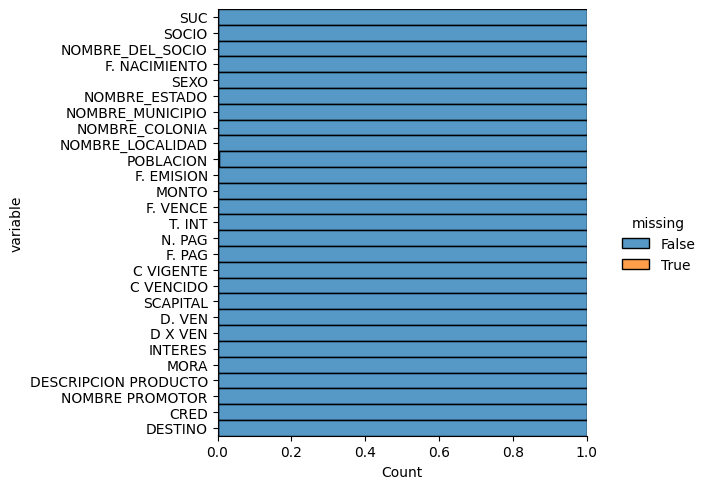

In [6]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [7]:
x = df.columns.to_series().groupby(df.dtypes).groups
x

{int64: ['SUC', 'T. INT', 'N. PAG', 'F. PAG', 'D. VEN', 'D X VEN'], object: ['SOCIO', 'NOMBRE_DEL_SOCIO', 'F. NACIMIENTO', 'SEXO', 'NOMBRE_ESTADO', 'NOMBRE_MUNICIPIO', 'NOMBRE_COLONIA', 'NOMBRE_LOCALIDAD', 'POBLACION', 'F. EMISION', 'MONTO', 'F. VENCE', 'C VIGENTE', 'C VENCIDO', 'SCAPITAL', 'INTERES', 'MORA', 'DESCRIPCION PRODUCTO', 'NOMBRE PROMOTOR', 'CRED', 'DESTINO']}

In [8]:
numeric_cols=['SUC', 'T. INT', 'N. PAG', 'F. PAG', 'D. VEN', 'D X VEN', 'SCAPITAL', 'MORA']

In [9]:
df['SCAPITAL']= df['SCAPITAL'].str.replace(',', '').astype(float)


In [10]:
df['MORA'] = df['MORA'].str.replace(',', '').astype(float)

In [11]:
x = df.columns.to_series().groupby(df.dtypes).groups
x

{int64: ['SUC', 'T. INT', 'N. PAG', 'F. PAG', 'D. VEN', 'D X VEN'], float64: ['SCAPITAL', 'MORA'], object: ['SOCIO', 'NOMBRE_DEL_SOCIO', 'F. NACIMIENTO', 'SEXO', 'NOMBRE_ESTADO', 'NOMBRE_MUNICIPIO', 'NOMBRE_COLONIA', 'NOMBRE_LOCALIDAD', 'POBLACION', 'F. EMISION', 'MONTO', 'F. VENCE', 'C VIGENTE', 'C VENCIDO', 'INTERES', 'DESCRIPCION PRODUCTO', 'NOMBRE PROMOTOR', 'CRED', 'DESTINO']}

In [12]:
df.describe()

,SUC,T. INT,N. PAG,F. PAG,SCAPITAL,D. VEN,D X VEN,MORA
count,10111.000000,10111.000000,10111.000000,10111.000000,10111.000000,10111.000000,10111.000000,10111.000000
mean,39.209870,41.381070,12.875977,41.032836,13382.815457,45.894669,22.533973,718.882566
std,71.959762,5.420505,4.962136,60.596480,16417.400887,227.110168,37.587711,4295.276943
min,1.000000,18.000000,1.000000,7.000000,67.000000,0.000000,0.000000,0.000000
25%,5.000000,36.000000,12.000000,30.000000,4998.910000,0.000000,8.000000,0.000000
50%,8.000000,42.000000,12.000000,30.000000,9977.200000,0.000000,16.000000,0.000000
75%,14.000000,48.000000,12.000000,30.000000,16666.355000,0.000000,25.000000,0.000000
max,205.000000,48.000000,60.000000,540.000000,220000.000000,2172.000000,362.000000,149741.650000


In [13]:
df.isna().sum()

SUC                      0
SOCIO                    0
NOMBRE_DEL_SOCIO         0
F. NACIMIENTO            0
SEXO                     0
NOMBRE_ESTADO            0
NOMBRE_MUNICIPIO         0
NOMBRE_COLONIA           0
NOMBRE_LOCALIDAD         0
POBLACION               40
F. EMISION               0
MONTO                    0
F. VENCE                 0
T. INT                   0
N. PAG                   0
F. PAG                   0
C VIGENTE                0
C VENCIDO                0
SCAPITAL                 0
D. VEN                   0
D X VEN                  0
INTERES                  0
MORA                     0
DESCRIPCION PRODUCTO     0
NOMBRE PROMOTOR          0
CRED                     0
DESTINO                  0
dtype: int64

In [14]:
df.duplicated(subset=['SUC','CRED']).sum()

0

In [15]:
df['SEXO'].value_counts()

F    6771
M    3340
Name: SEXO, dtype: int64

In [16]:
F = df['SEXO'].value_counts()[0]
H = df['SEXO'].value_counts()[1]

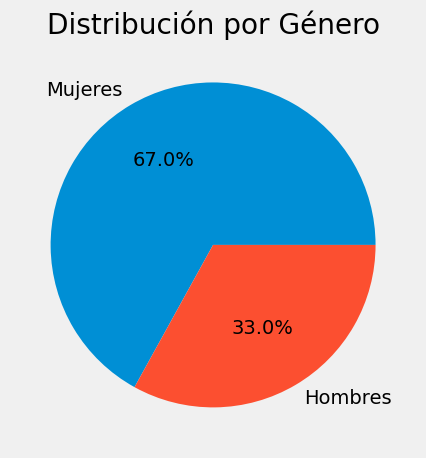

In [17]:
plt.style.use("fivethirtyeight")
slices = [F,H]
labels = ['Mujeres', 'Hombres']
plt.pie(slices, labels=labels, autopct='%1.1f%%')
plt.title("Distribución por Género")
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Cantidad')

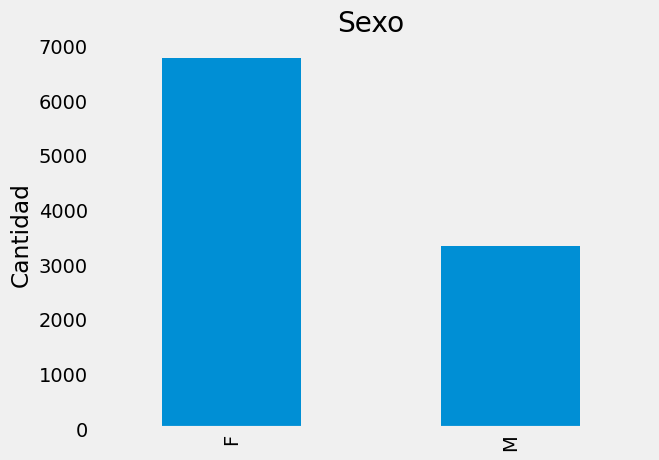

In [18]:
df['SEXO'].value_counts()\
.plot(kind='bar', title='Sexo')
plt.grid()
plt.ylabel('Cantidad')


In [19]:
df.groupby('SEXO')['MORA'] \
.agg(['mean', 'count', 'sum'])\
.query('count >= 10')\
.sort_values(by='count', ascending=False)

,mean,count,sum
SEXO,,,
F,721.688110,6771,4886550.19
M,713.195039,3340,2382071.43


Text(0, 0.5, 'Mora ($)')

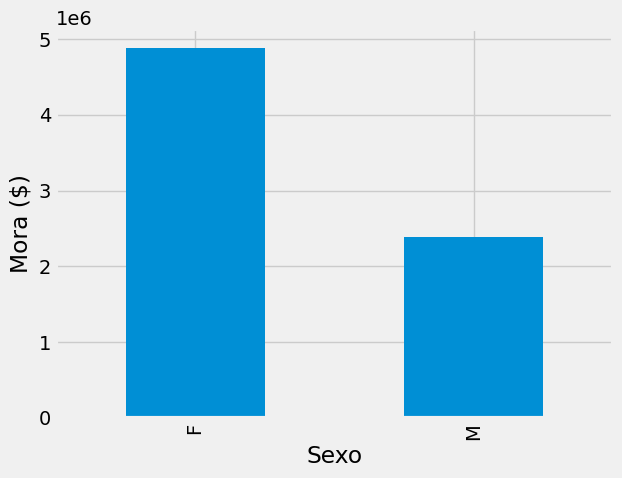

In [20]:
df.groupby('SEXO')['MORA'] \
.agg('sum').plot(kind='bar')
plt.xlabel('Sexo')
plt.ylabel('Mora ($)')

In [21]:
df.groupby('SEXO')['SCAPITAL'] \
.agg(['mean', 'count', 'sum'])\
.query('count >= 10')\
.sort_values(by='count', ascending=False)

,mean,count,sum
SEXO,,,
F,12329.253788,6771,83481377.40
M,15518.643620,3340,51832269.69


In [22]:
numeric_cols

['SUC', 'T. INT', 'N. PAG', 'F. PAG', 'D. VEN', 'D X VEN', 'SCAPITAL', 'MORA']

In [23]:
df_corr = df[numeric_cols].dropna().corr()
df_corr

,SUC,T. INT,N. PAG,F. PAG,D. VEN,D X VEN,SCAPITAL,MORA
SUC,1.000000,0.143048,0.147553,0.005111,0.241974,-0.002473,0.063910,0.111794
T. INT,0.143048,1.000000,0.017092,-0.445072,0.157366,-0.399727,-0.259268,0.078091
N. PAG,0.147553,0.017092,1.000000,-0.497190,0.052897,-0.361487,-0.109243,0.006681
F. PAG,0.005111,-0.445072,-0.497190,1.000000,-0.056218,0.782524,0.474015,0.011849
D. VEN,0.241974,0.157366,0.052897,-0.056218,1.000000,-0.121160,-0.066780,0.672713
D X VEN,-0.002473,-0.399727,-0.361487,0.782524,-0.121160,1.000000,0.418625,-0.100346
SCAPITAL,0.063910,-0.259268,-0.109243,0.474015,-0.066780,0.418625,1.000000,0.056046
MORA,0.111794,0.078091,0.006681,0.011849,0.672713,-0.100346,0.056046,1.000000


<Axes: >

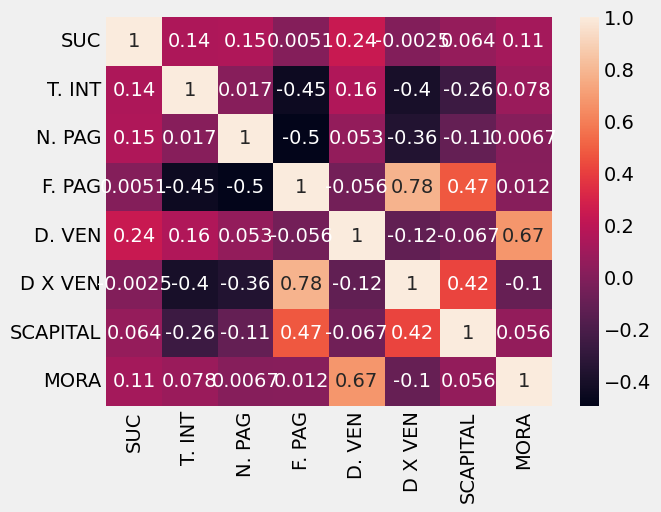

In [24]:
sns.heatmap(df_corr, annot=True)

In [25]:
df.groupby('NOMBRE_ESTADO')['SCAPITAL'] \
.agg(['mean', 'count', 'sum'])\
.query('count >= 10')\
.sort_values(by='count', ascending=False).head(10)

,mean,count,sum
NOMBRE_ESTADO,,,
PUEBLA,11773.697042,5467,64366801.73
HIDALGO,12280.381564,1931,23713416.80
OAXACA,15925.142855,1632,25989833.14
VERACRUZ DE IGNACIO DE LA LLAVE,11709.906383,506,5925212.63
BAJA CALIFORNIA,18488.748484,277,5121383.33
SAN LUIS POTOSI,11768.930791,177,2083100.75
MORELOS,79166.666627,83,6570833.33
GUERRERO,46296.296296,27,1250000.00


In [26]:
df.groupby('NOMBRE_MUNICIPIO')['SCAPITAL'] \
.agg(['mean', 'count', 'sum'])\
.query('count >= 10')\
.sort_values(by='count', ascending=False).head(15)

,mean,count,sum
NOMBRE_MUNICIPIO,,,
PAHUATLAN,14705.088836,962,14146295.46
HUEYAPAN,10827.475108,558,6041731.11
SAN FELIPE ORIZATLAN,13505.221271,543,7333335.15
HUEJUTLA DE REYES,12543.280849,542,6798458.22
SANTIAGO JUXTLAHUACA,14967.983351,376,5627961.74
HUEHUETLA,8976.009083,360,3231363.27
AHUACATLAN,11593.026288,326,3779326.57
TENANGO DE DORIA,12715.585876,274,3484070.53
AYOTOXCO DE GUERRERO,10709.066377,265,2837902.59


In [27]:
localidad = df.groupby('NOMBRE_LOCALIDAD')['SCAPITAL'] \
.agg(['mean', 'count', 'sum'])\
.query('count >= 10')\
.sort_values(by='count', ascending=False).head(15)

localidad

,mean,count,sum
NOMBRE_LOCALIDAD,,,
SANTIAGO JUXTLAHUACA,14588.463190,326,4755839.00
HUEYAPAN,11696.267652,247,2888978.11
SAN PABLITO,14270.431787,235,3353551.47
SANTIAGO XONACATL�N,12230.631818,165,2018054.25
CIUDAD DE PAHUATL�N DE VALLE,14307.864545,154,2203411.14
AYOTOXCO DE GUERRERO,11390.072017,119,1355418.57
HEROICA CIUDAD DE EJUTLA DE CRESPO,20681.712348,115,2378396.92
TLACUILOTEPEC,15911.651150,113,1798016.58
SAN ANDR�S SABINILLO,16071.075982,112,1799960.51


<Axes: ylabel='NOMBRE_LOCALIDAD'>

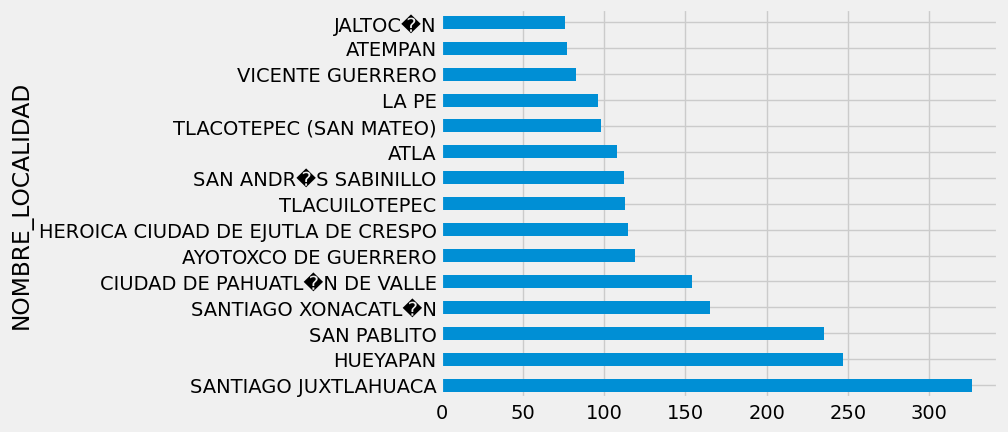

In [28]:
localidad['count'].plot(kind='barh')

In [29]:
df.groupby('NOMBRE_ESTADO')['SEXO'].value_counts().sort_values(ascending=False)

NOMBRE_ESTADO                    SEXO
PUEBLA                           F       3527
                                 M       1940
HIDALGO                          F       1354
OAXACA                           F       1164
HIDALGO                          M        577
OAXACA                           M        468
VERACRUZ DE IGNACIO DE LA LLAVE  F        367
BAJA CALIFORNIA                  F        181
VERACRUZ DE IGNACIO DE LA LLAVE  M        139
SAN LUIS POTOSI                  F        125
BAJA CALIFORNIA                  M         96
MORELOS                          M         59
SAN LUIS POTOSI                  M         52
MORELOS                          F         24
GUERRERO                         F         22
                                 M          5
MEXICO                           F          4
DISTRITO FEDERAL                 F          3
MEXICO                           M          2
DISTRITO FEDERAL                 M          1
BAJA CALIFORNIA SUR              M        

In [30]:
edo_vs_sexo=pd.pivot_table(df, values="CRED", index=["NOMBRE_ESTADO"], columns=["SEXO"], aggfunc=np.count_nonzero)
edo_vs_sexo



SEXO,F,M
NOMBRE_ESTADO,,
BAJA CALIFORNIA,181.0,96.0
BAJA CALIFORNIA SUR,NaN,1.0
DISTRITO FEDERAL,3.0,1.0
GUERRERO,22.0,5.0
HIDALGO,1354.0,577.0
MEXICO,4.0,2.0
MORELOS,24.0,59.0
OAXACA,1164.0,468.0
PUEBLA,3527.0,1940.0


Text(0.5, 1.0, 'Estado vs Sexo')

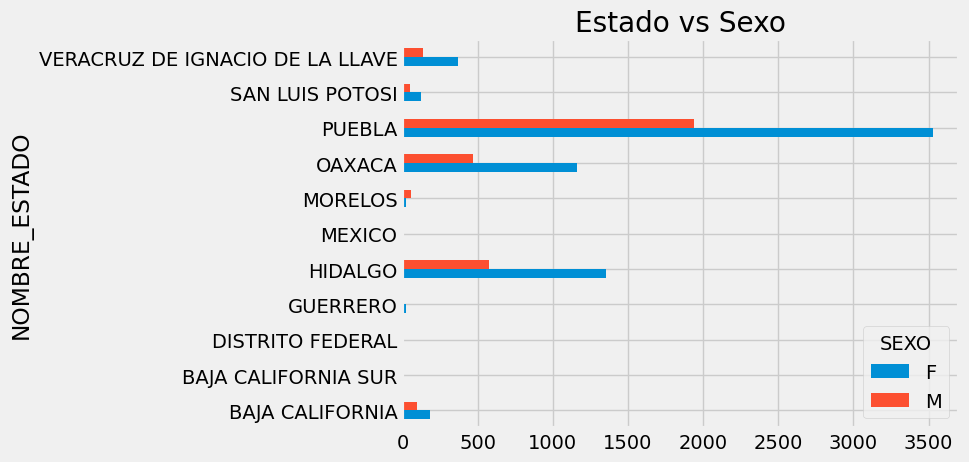

In [31]:
edo_vs_sexo.plot(kind='barh')
plt.title('Estado vs Sexo')

In [32]:
df['DESCRIPCION PRODUCTO'].unique()

array(['CREDITO COLABORADORES', 'CREDITO AGROPECUARIO SOLIDARIO',
       'CREDITO GARANTIZADO SOBRE INVERSION',
       'CREDITO PRODUCTIVO ESTRATEGICO 1',
       'CREDITO AGROPECUARIO INDIVIDUAL', 'CREDITO NEGOCIO',
       'CREDITO PARA EMPLEADOS Y DIRECTIVOS', 'CREDITO MEJORA LA CASA',
       'CREDITO MI CASA AUTOPRODUCCION', 'CREDITO DE CONSUMO',
       'CREDITO NEGOCIO SOLIDARIO',
       'CREDITO MI CASA AUTOPRODUCCION PROTOTIPO',
       'CREDITO MI CASA MEJORAMIENTO',
       'CREDITO EMPRENDEDOR Y MICROEMPRESARIAL', 'CREDITO EMPRESARIAL'],
      dtype=object)

In [33]:
pivoted =pd.pivot_table(df, values="CRED", index=["DESCRIPCION PRODUCTO"], columns=["DESTINO"], aggfunc=np.count_nonzero)
pivoted


DESTINO,AMPLIACION/ REMODELACION CASA,COMPRA CASA,COMPRA DE ANIMALES DE TRASPATIO,COMPRA DE GANADO,COMPRA DE MERCANCIA,COMPRA INSUMOS,COMPRA MATERIA PRIMA,COMPRA SEMILLAS,COMPRA TERRENO,COMPRA/ AMPLIACION/ REMODELACION NEGOCIO,COMPRA/ REFACCION LINEA BLANCA O MUEBLES,COMPRA/ REFACCION MATERIAL AGRICOLA,COMPRA/ REFACCION MATERIAL DE TRABAJO,COMPRA/ REFACCION VEHICULO,CREDITO MI CASA AUTOPRODUCCION,CREDITO MI CASA AUTOPRODUCCION PROTOTIPO,CREDITO MI CASA MEJORAMIENTO,FIESTA O CELEBRACIONES,GASTOS ESCOLARES,GASTOS LEGALES,GASTOS MEDICOS,GASTOS VINCULADOS AL GANADO,MIGRACION,OTROS,PAGO DE SERVICIOS,PAGO DEUDA,PAGO EMPLEADOS,PAGO JORNALEROS
DESCRIPCION PRODUCTO,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CREDITO AGROPECUARIO INDIVIDUAL,NaN,NaN,2.0,10.0,7.0,56.0,4.0,10.0,1.0,2.0,NaN,20.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,NaN,1.0,NaN,NaN,NaN,39.0
CREDITO AGROPECUARIO SOLIDARIO,NaN,NaN,4.0,NaN,NaN,16.0,13.0,12.0,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
CREDITO COLABORADORES,7.0,NaN,NaN,NaN,3.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0,NaN,NaN,7.0,NaN,2.0,NaN,NaN
CREDITO DE CONSUMO,1.0,NaN,1.0,3.0,8.0,3.0,NaN,NaN,22.0,1.0,16.0,1.0,NaN,12.0,NaN,NaN,NaN,47.0,50.0,20.0,66.0,NaN,7.0,3.0,1.0,20.0,NaN,NaN
CREDITO EMPRENDEDOR Y MICROEMPRESARIAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CREDITO EMPRESARIAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
CREDITO GARANTIZADO SOBRE INVERSION,5.0,NaN,NaN,NaN,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,2.0
CREDITO MEJORA LA CASA,2794.0,NaN,NaN,NaN,33.0,1.0,1.0,NaN,13.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
CREDITO MI CASA AUTOPRODUCCION,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
f = (df['DESCRIPCION PRODUCTO'] == ('CREDITO DE CONSUMO'))\
      | (df['DESCRIPCION PRODUCTO'] == ('CREDITO NEGOCIO'))\
      | (df['DESCRIPCION PRODUCTO'] == ('CREDITO MEJORA LA CASA'))
df2 = df[f]

In [35]:
pivoted =pd.pivot_table(df2, values="CRED", index=["DESCRIPCION PRODUCTO"], columns=["DESTINO"], aggfunc=np.count_nonzero)
pivoted

DESTINO,AMPLIACION/ REMODELACION CASA,COMPRA CASA,COMPRA DE ANIMALES DE TRASPATIO,COMPRA DE GANADO,COMPRA DE MERCANCIA,COMPRA INSUMOS,COMPRA MATERIA PRIMA,COMPRA SEMILLAS,COMPRA TERRENO,COMPRA/ AMPLIACION/ REMODELACION NEGOCIO,COMPRA/ REFACCION LINEA BLANCA O MUEBLES,COMPRA/ REFACCION MATERIAL AGRICOLA,COMPRA/ REFACCION MATERIAL DE TRABAJO,COMPRA/ REFACCION VEHICULO,FIESTA O CELEBRACIONES,GASTOS ESCOLARES,GASTOS LEGALES,GASTOS MEDICOS,GASTOS VINCULADOS AL GANADO,MIGRACION,OTROS,PAGO DE SERVICIOS,PAGO DEUDA,PAGO EMPLEADOS,PAGO JORNALEROS
DESCRIPCION PRODUCTO,,,,,,,,,,,,,,,,,,,,,,,,,
CREDITO DE CONSUMO,1.0,NaN,1.0,3.0,8.0,3.0,NaN,NaN,22.0,1.0,16.0,1.0,NaN,12.0,47.0,50.0,20.0,66.0,NaN,7.0,3.0,1.0,20.0,NaN,NaN
CREDITO MEJORA LA CASA,2794.0,NaN,NaN,NaN,33.0,1.0,1.0,NaN,13.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
CREDITO NEGOCIO,54.0,2.0,94.0,72.0,2621.0,204.0,312.0,54.0,21.0,91.0,9.0,27.0,77.0,52.0,NaN,1.0,NaN,1.0,25.0,NaN,3.0,NaN,NaN,2.0,177.0


In [36]:
pivoted =pd.pivot_table(df2, values="CRED", index=["DESTINO"], columns=["DESCRIPCION PRODUCTO"], aggfunc=np.count_nonzero)
pivoted

DESCRIPCION PRODUCTO,CREDITO DE CONSUMO,CREDITO MEJORA LA CASA,CREDITO NEGOCIO
DESTINO,,,
AMPLIACION/ REMODELACION CASA,1.0,2794.0,54.0
COMPRA CASA,NaN,NaN,2.0
COMPRA DE ANIMALES DE TRASPATIO,1.0,NaN,94.0
COMPRA DE GANADO,3.0,NaN,72.0
COMPRA DE MERCANCIA,8.0,33.0,2621.0
COMPRA INSUMOS,3.0,1.0,204.0
COMPRA MATERIA PRIMA,NaN,1.0,312.0
COMPRA SEMILLAS,NaN,NaN,54.0
COMPRA TERRENO,22.0,13.0,21.0


<Axes: ylabel='DESTINO'>

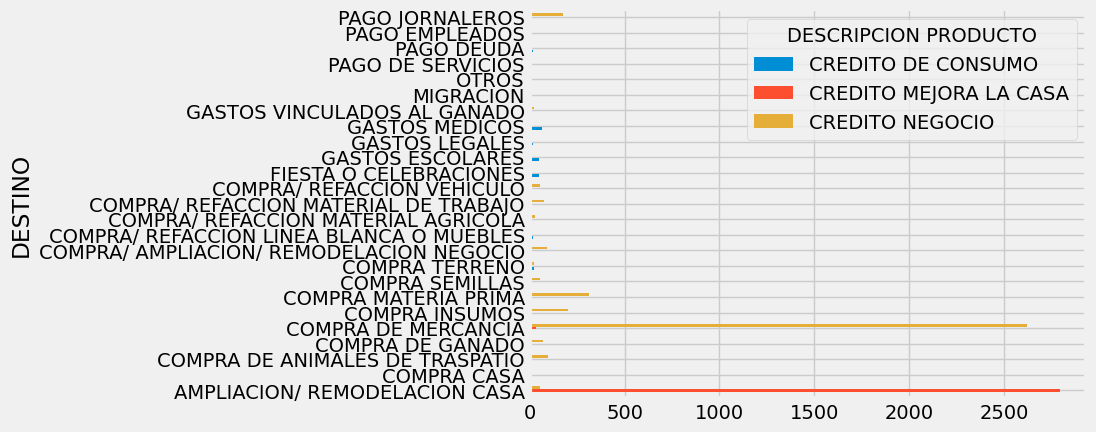

In [37]:
pivoted.plot(kind='barh')

In [38]:
pivoted =pd.pivot_table(df2, values="SCAPITAL", index=["DESTINO"], columns=["DESCRIPCION PRODUCTO"], aggfunc=np.sum)
pivoted

DESCRIPCION PRODUCTO,CREDITO DE CONSUMO,CREDITO MEJORA LA CASA,CREDITO NEGOCIO
DESTINO,,,
AMPLIACION/ REMODELACION CASA,6624.17,36129778.23,473733.34
COMPRA CASA,NaN,NaN,36242.03
COMPRA DE ANIMALES DE TRASPATIO,12243.34,NaN,1020686.57
COMPRA DE GANADO,16846.46,NaN,1191361.00
COMPRA DE MERCANCIA,54214.80,340759.86,32304242.91
COMPRA INSUMOS,18365.46,14936.85,2320308.25
COMPRA MATERIA PRIMA,NaN,12219.94,3717771.08
COMPRA SEMILLAS,NaN,NaN,687659.30
COMPRA TERRENO,406354.80,210426.37,322611.57


<Axes: ylabel='DESTINO'>

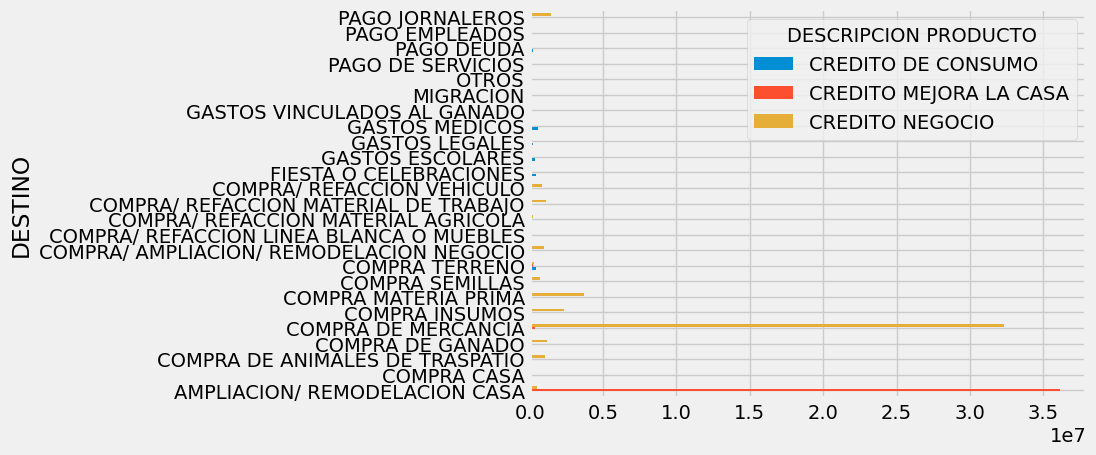

In [39]:
pivoted.plot(kind='barh')

In [40]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [42]:
df.groupby(by='Animal').sum()

,Max Speed
Animal,
Falcon,750.0
Parrot,50.0


In [45]:
p= df.pivot_table(index='Animal', values='Max Speed', aggfunc='sum')
p

,Max Speed
Animal,
Falcon,750.0
Parrot,50.0


<Axes: ylabel='Animal'>

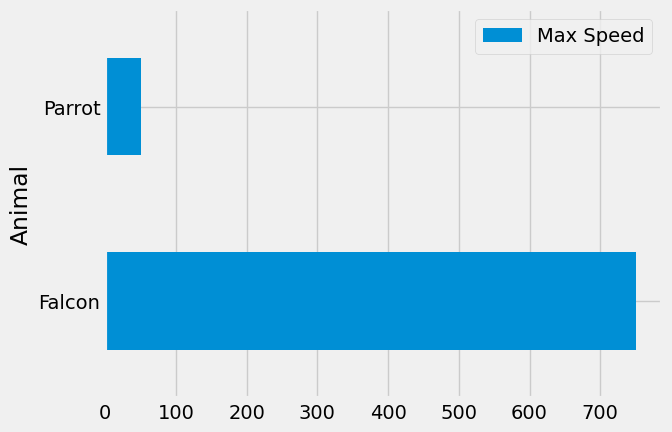

In [49]:
p.plot(kind='barh')

In [47]:
pt = df.pivot_table(columns='Animal', values='Max Speed', aggfunc='sum')
pt

Animal,Falcon,Parrot
Max Speed,750.0,50.0


<Axes: >

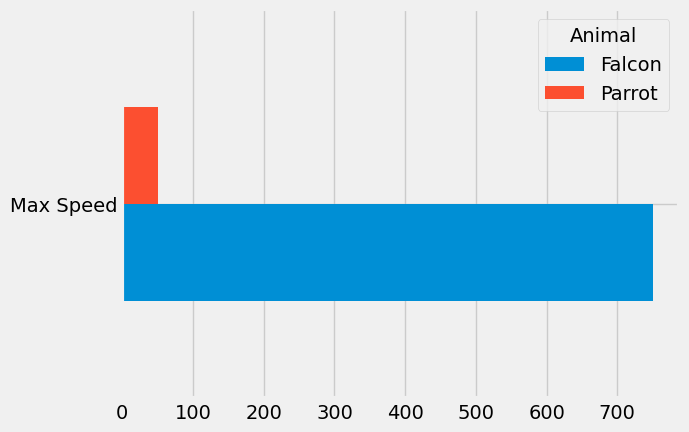

In [50]:
pt.plot(kind='barh')

In [59]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
                  index=index)
df

Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

In [60]:
df.groupby(level=0).mean()

,Max Speed
Animal,
Falcon,370.0
Parrot,25.0


In [61]:
df.groupby(level="Type").mean()

,Max Speed
Type,
Captive,210.0
Wild,185.0


In [64]:
df.pivot_table(values='Max Speed', index='Animal', aggfunc='mean' )

,Max Speed
Animal,
Falcon,370.0
Parrot,25.0


In [65]:
df.pivot_table(values='Max Speed', index='Type', aggfunc='mean' )

,Max Speed
Type,
Captive,210.0
Wild,185.0


In [66]:
df.pivot_table(values='Max Speed', index='Type', aggfunc='mean', columns='Animal' )

Animal,Falcon,Parrot
Type,,
Captive,390.0,30.0
Wild,350.0,20.0


In [70]:
df.pivot_table(values='Max Speed', index='Type', aggfunc='mean', columns='Animal')

Animal,Falcon,Parrot
Type,,
Captive,390.0,30.0
Wild,350.0,20.0


In [71]:
technologies   = ({
    'Courses':["Spark","PySpark","Hadoop","Python","Pandas","Hadoop","Spark","Python","NA"],
    'Fee' :[22000,25000,23000,24000,26000,25000,25000,22000,1500],
    'Duration':['30days','50days','55days','40days','60days','35days','30days','50days','40days'],
    'Discount':[1000,2300,1000,1200,2500,None,1400,1600,0]
          })
df = pd.DataFrame(technologies)
df

,Courses,Fee,Duration,Discount
0,Spark,22000,30days,1000.0
1,PySpark,25000,50days,2300.0
2,Hadoop,23000,55days,1000.0
3,Python,24000,40days,1200.0
4,Pandas,26000,60days,2500.0
5,Hadoop,25000,35days,NaN
6,Spark,25000,30days,1400.0
7,Python,22000,50days,1600.0
8,NA,1500,40days,0.0


In [73]:
gp = df.groupby(['Courses']).sum()
gp

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_800\232574515.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gp = df.groupby(['Courses']).sum()


,Fee,Discount
Courses,,
Hadoop,48000,1000.0
NA,1500,0.0
Pandas,26000,2500.0
PySpark,25000,2300.0
Python,46000,2800.0
Spark,47000,2400.0


<Axes: ylabel='Courses'>

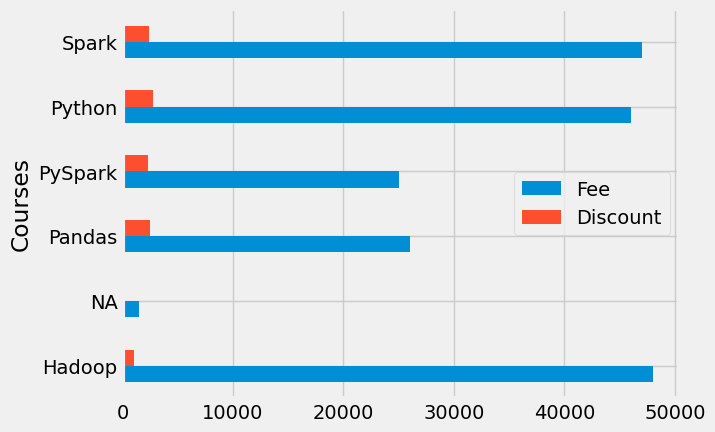

In [74]:
gp.plot(kind='barh')

In [78]:
df.pivot_table(index='Courses', values=['Fee', 'Discount'], aggfunc='sum')

,Discount,Fee
Courses,,
Hadoop,1000.0,48000
NA,0.0,1500
Pandas,2500.0,26000
PySpark,2300.0,25000
Python,2800.0,46000
Spark,2400.0,47000


In [79]:
df.groupby(['Courses', 'Duration']).sum()

Fee  Discount
Courses Duration                 
Hadoop  35days    25000       0.0
        55days    23000    1000.0
NA      40days     1500       0.0
Pandas  60days    26000    2500.0
PySpark 50days    25000    2300.0
Python  40days    24000    1200.0
        50days    22000    1600.0
Spark   30days    47000    2400.0

<Axes: ylabel='Courses,Duration'>

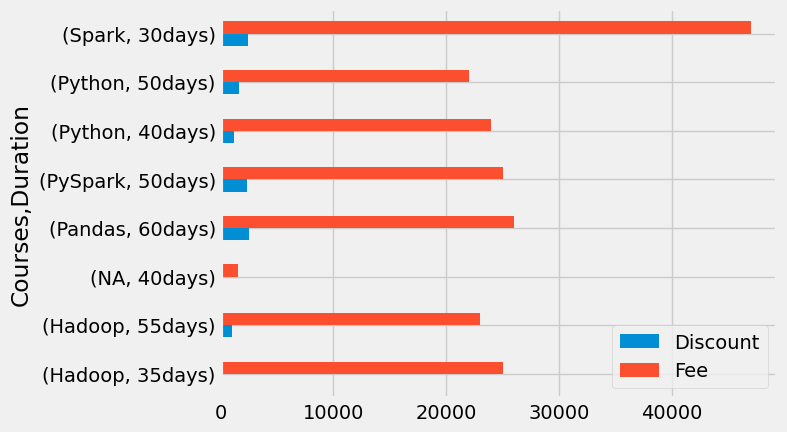

In [81]:
df.pivot_table(index=['Courses', 'Duration'], values=['Fee', 'Discount'], aggfunc='sum').plot(kind='barh')

In [82]:
df2 = df.groupby(['Courses','Duration']).sum().reset_index()
df2

,Courses,Duration,Fee,Discount
0,Hadoop,35days,25000,0.0
1,Hadoop,55days,23000,1000.0
2,NA,40days,1500,0.0
3,Pandas,60days,26000,2500.0
4,PySpark,50days,25000,2300.0
5,Python,40days,24000,1200.0
6,Python,50days,22000,1600.0
7,Spark,30days,47000,2400.0


In [92]:
df

,Courses,Fee,Duration,Discount
0,Spark,22000,30days,1000.0
1,PySpark,25000,50days,2300.0
2,Hadoop,23000,55days,1000.0
3,Python,24000,40days,1200.0
4,Pandas,26000,60days,2500.0
5,Hadoop,25000,35days,NaN
6,Spark,25000,30days,1400.0
7,Python,22000,50days,1600.0
8,NA,1500,40days,0.0


In [91]:
df.pivot_table(index=['Courses', 'Duration'], values=['Fee', 'Discount'], aggfunc='sum').reset_index()

,Courses,Duration,Discount,Fee
0,Hadoop,35days,0.0,25000
1,Hadoop,55days,1000.0,23000
2,NA,40days,0.0,1500
3,Pandas,60days,2500.0,26000
4,PySpark,50days,2300.0,25000
5,Python,40days,1200.0,24000
6,Python,50days,1600.0,22000
7,Spark,30days,2400.0,47000


In [93]:
df2=df.groupby(by=['Courses'], dropna=False).sum()
df2

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_800\705829737.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df.groupby(by=['Courses'], dropna=False).sum()


,Fee,Discount
Courses,,
Hadoop,48000,1000.0
NA,1500,0.0
Pandas,26000,2500.0
PySpark,25000,2300.0
Python,46000,2800.0
Spark,47000,2400.0


In [95]:
df.pivot_table(index=['Courses'], values=['Fee', 'Discount'], aggfunc='sum')

,Discount,Fee
Courses,,
Hadoop,1000.0,48000
NA,0.0,1500
Pandas,2500.0,26000
PySpark,2300.0,25000
Python,2800.0,46000
Spark,2400.0,47000


In [96]:
df2=df.groupby(by=['Courses'], dropna=True).sum()
df2

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_800\2077123397.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df.groupby(by=['Courses'], dropna=True).sum()


,Fee,Discount
Courses,,
Hadoop,48000,1000.0
NA,1500,0.0
Pandas,26000,2500.0
PySpark,25000,2300.0
Python,46000,2800.0
Spark,47000,2400.0


In [98]:
df.pivot_table(index=['Courses'], values=['Fee', 'Discount'], aggfunc='sum', dropna=True)

,Discount,Fee
Courses,,
Hadoop,1000.0,48000
NA,0.0,1500
Pandas,2500.0,26000
PySpark,2300.0,25000
Python,2800.0,46000
Spark,2400.0,47000


In [102]:
df2=df.groupby(by=['Courses'], sort=False).sum()
df2

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_800\2336686791.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df.groupby(by=['Courses'], sort=False).sum()


,Fee,Discount
Courses,,
Spark,47000,2400.0
PySpark,25000,2300.0
Hadoop,48000,1000.0
Python,46000,2800.0
Pandas,26000,2500.0
NA,1500,0.0


In [101]:
df.pivot_table(index=['Courses'], values=['Fee', 'Discount'], aggfunc='sum', sort=False)

,Fee,Discount
Courses,,
Spark,47000,2400.0
PySpark,25000,2300.0
Hadoop,48000,1000.0
Python,46000,2800.0
Pandas,26000,2500.0
NA,1500,0.0


In [103]:
# Sorting group keys on descending order
groupedDF = df.groupby('Courses',sort=False).sum()
sortedDF=groupedDF.sort_values('Courses', ascending=False)
print(sortedDF)

           Fee  Discount
Courses                 
Spark    47000    2400.0
Python   46000    2800.0
PySpark  25000    2300.0
Pandas   26000    2500.0
NA        1500       0.0
Hadoop   48000    1000.0


C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_800\3166223011.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedDF = df.groupby('Courses',sort=False).sum()


In [108]:
df.groupby('Courses').apply(lambda x: x.sort_values('Fee'))

Courses    Fee Duration  Discount
Courses                                     
Hadoop  2   Hadoop  23000   55days    1000.0
        5   Hadoop  25000   35days       NaN
NA      8       NA   1500   40days       0.0
Pandas  4   Pandas  26000   60days    2500.0
PySpark 1  PySpark  25000   50days    2300.0
Python  7   Python  22000   50days    1600.0
        3   Python  24000   40days    1200.0
Spark   0    Spark  22000   30days    1000.0
        6    Spark  25000   30days    1400.0

In [115]:
p= df.pivot_table(index=['Courses'], values=['Fee', 'Discount'], aggfunc='sum', sort=False)
p.sort_values('Discount', ascending=False)

,Fee,Discount
Courses,,
Python,46000,2800.0
Pandas,26000,2500.0
Spark,47000,2400.0
PySpark,25000,2300.0
Hadoop,48000,1000.0
NA,1500,0.0


In [117]:
# Create a DataFrame
df = pd.DataFrame({'Student Names' : ['Jenny', 'Singh', 'Charles', 'Richard', 'Veena'],
                   'Category' : ['Online', 'Offline', 'Offline', 'Offline', 'Online'],
                   'Gender' : ['Female', 'Male', 'Male', 'Male', 'Female'],
                  'Courses': ['Java', 'Spark', 'PySpark','Hadoop','C'],
                   'Fee': [15000, 17000, 27000, 29000, 12000],
                   'Discount': [1100, 800, 1000, 1600, 600]})
df

,Student Names,Category,Gender,Courses,Fee,Discount
0,Jenny,Online,Female,Java,15000,1100
1,Singh,Offline,Male,Spark,17000,800
2,Charles,Offline,Male,PySpark,27000,1000
3,Richard,Offline,Male,Hadoop,29000,1600
4,Veena,Online,Female,C,12000,600


In [122]:
df.groupby(by='Gender').mean()

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_800\3233550352.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Gender').mean()


,Fee,Discount
Gender,,
Female,13500.000000,850.000000
Male,24333.333333,1133.333333


C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_800\450325691.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.pivot_table(df, index=['Gender']).plot(kind='bar')


<Axes: xlabel='Gender'>

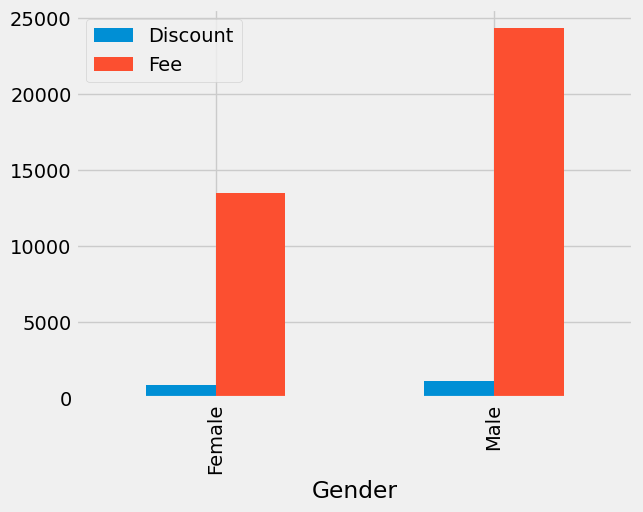

In [124]:
pd.pivot_table(df, index=['Gender']).plot(kind='bar')

In [125]:
pd.pivot_table(df, index=['Gender', 'Category']) 

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_800\3402125161.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.pivot_table(df, index=['Gender', 'Category'])


,,Discount,Fee
Gender,Category,,
Female,Online,850.000000,13500.000000
Male,Offline,1133.333333,24333.333333


In [126]:
df.groupby(['Gender', 'Category']).mean()

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_800\201413974.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Gender', 'Category']).mean()


,,Fee,Discount
Gender,Category,,
Female,Online,13500.000000,850.000000
Male,Offline,24333.333333,1133.333333


In [127]:
pd.pivot_table(df, index=['Gender'], aggfunc= {'Fee': 'mean', 'Discount': 'sum'})

,Discount,Fee
Gender,,
Female,1700,13500.000000
Male,3400,24333.333333


In [128]:
pd.pivot_table(df, index = ['Gender'], values = ['Discount'], aggfunc = 'mean' )

,Discount
Gender,
Female,850.000000
Male,1133.333333


<Axes: ylabel='Gender'>

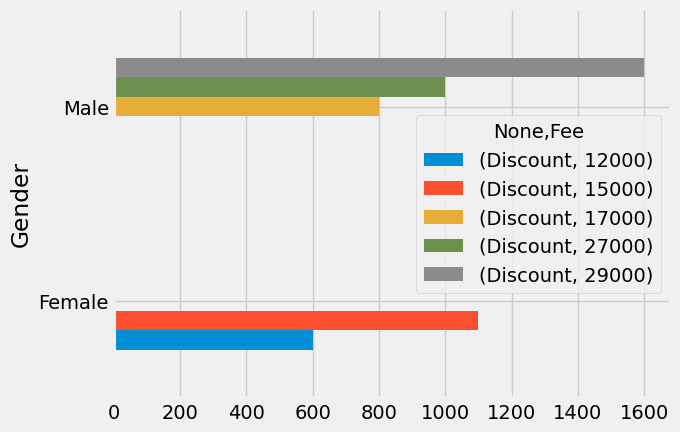

In [130]:
pd.pivot_table(df, index= ['Gender'], columns = ['Fee'], values=['Discount'], aggfunc = 'mean' ).plot(kind='barh')

In [131]:
# Fill the NaN value using fill_value
p_table = pd.pivot_table(df, index= ['Gender'], columns = ['Fee'], values=['Discount'], aggfunc = 'mean', fill_value = 0 )
p_table

Discount                        
Fee       12000 15000 17000 27000 29000
Gender                                 
Female      600  1100     0     0     0
Male          0     0   800  1000  1600